# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [1]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
import seaborn as sns
import matplotlib.pyplot as plt

## Data Importing

In [2]:
# load one file first to see what type of data you're dealing with and what attributes it has
with open('../data/AK_Juneau_1.json', 'r') as f:
    jdata = json.load(f)

In [3]:
# check the keys
jdata.keys()
jdata['data'].keys()
data = jdata['data']['results']

# unpack nested json dictionary
df = pd.json_normalize(data)
df 

,primary_photo,last_update_date,source,tags,permalink,status,list_date,open_houses,branding,list_price,...,location.county.fips_code,location.county.name,source.plan_id,source.agents,source.spec_id,source.type,products.brand_name,location.address.coordinate.lon,location.address.coordinate.lat,other_listings
0,None,None,NaN,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,NaN,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,NaN,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,NaN,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,2023-08-04T22:49:14Z,NaN,"[carport, hill_or_mountain_view, ocean_view, s...",11909-Glacier-Hwy-Apt-105_Juneau_AK_99801_M741...,sold,2023-08-21T21:01:22.000000Z,None,[{'name': 'Platinum Keller Williams Realty Ala...,415000.0,...,None,Juneau,NaN,[{'office_name': 'Platinum Keller Williams Rea...,NaN,mls,basic_opt_in,-134.649067,58.386651,NaN
5,None,2023-08-04T21:31:44Z,NaN,"[city_view, community_outdoor_space, community...",808-5th-St_Juneau_AK_99801_M76604-90777,sold,2023-08-21T21:01:22.000000Z,None,"[{'name': 'Southeast Alaska Real Estate', 'pho...",835000.0,...,None,Juneau,NaN,[{'office_name': 'Southeast Alaska Real Estate...,NaN,mls,essentials,-134.403991,58.304573,NaN
6,None,2023-12-07,NaN,None,4446-Trafalgar-Ave_Juneau_AK_99801_M82741-21172,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,-134.553717,58.396178,NaN


In [4]:
# get all columns from df
for col in df:
    print(col)

primary_photo
last_update_date
source
tags
permalink
status
list_date
open_houses
branding
list_price
property_id
photos
community
products
virtual_tours
listing_id
price_reduced_amount
matterport
description.year_built
description.baths_3qtr
description.sold_date
description.sold_price
description.baths_full
description.name
description.baths_half
description.lot_sqft
description.sqft
description.baths
description.sub_type
description.baths_1qtr
description.garage
description.stories
description.beds
description.type
lead_attributes.show_contact_an_agent
flags.is_new_construction
flags.is_for_rent
flags.is_subdivision
flags.is_contingent
flags.is_price_reduced
flags.is_pending
flags.is_foreclosure
flags.is_plan
flags.is_coming_soon
flags.is_new_listing
other_listings.rdc
location.address.postal_code
location.address.state
location.address.coordinate
location.address.city
location.address.state_code
location.address.line
location.street_view_url
location.county.fips_code
location.count

In [5]:
# loop over all files and put them into a dataframe

In [6]:
# directory path to JSON files
dir_path = '../data'

# create an empty list to store dataframes
dfs = []

# iterate over all JSON files in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.json'):
        file_path = os.path.join(dir_path, filename)
        
        # open and read each JSON file
        with open(file_path, 'r') as file:
            jdata = json.load(file)  # load JSON data
        data = jdata['data']['results']
        
        # normalize the JSON data (assuming similar structure in all files)
        dataframe = pd.json_normalize(data, sep='_')  
        
        # append the df to the list
        dfs.append(dataframe)

# concatenate all dfs into a single one
df = pd.concat(dfs, ignore_index=True)

# final df
df

C:\Users\werwa\AppData\Local\Temp\ipykernel_5416\3819836471.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, ignore_index=True)


,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,...,location_county_fips_code,location_county_name,primary_photo,source,products,location_address_coordinate,other_listings,community_advertisers,community_description_name,location_county
0,2023-09-19T20:52:50Z,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9074430767,"[{'tags': [{'label': 'house_view', 'probabilit...",...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9424983842,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9479068516,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9879331943,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9521639574,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.reset_index(drop=True) 
df

,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,...,location_county_fips_code,location_county_name,primary_photo,source,products,location_address_coordinate,other_listings,community_advertisers,community_description_name,location_county
0,2023-09-19T20:52:50Z,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9074430767,"[{'tags': [{'label': 'house_view', 'probabilit...",...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9424983842,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9479068516,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9879331943,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9521639574,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# df.to_csv("../data/housing_df.csv", index = False)

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [9]:
# df = pd.read_csv('../data/housing_df.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   last_update_date                       8125 non-null   object 
 1   tags                                   7638 non-null   object 
 2   permalink                              8159 non-null   object 
 3   status                                 8159 non-null   object 
 4   list_date                              7752 non-null   object 
 5   open_houses                            0 non-null      object 
 6   branding                               8159 non-null   object 
 7   list_price                             7721 non-null   float64
 8   property_id                            8159 non-null   object 
 9   photos                                 7403 non-null   object 
 10  community                              0 non-null      object 
 11  virt

In [11]:
# Drop fully null columns
null_columns_ls = df.columns[df.isnull().all()].tolist()
df = df.drop(columns = null_columns_ls)

# Drop almost null columns (safeguard against non-existent columns)
almost_null_columns = ['source_plan_id', 
                       'source_spec_id', 
                       'flags_is_foreclosure',
                       'community_advertisers', 
                       'community_description_name'
                      ]
df = df.drop(columns = almost_null_columns, errors = 'ignore')

# Drop columns that will not be needed for the model
unnecessary_columns = ['last_update_date', 
                       'permalink', 
                       'status', 
                       'list_date', 
                       'branding', 
                       'list_price', 
                       'property_id', 
                       'photos',  
                       'virtual_tours', 
                       'listing_id', 
                       'price_reduced_amount', 
                       'matterport', 
                       'primary_photo_href', 
                       'source_agents', 
                       'source_type',
                       'other_listings_rdc',
                       'products_brand_name',
                       'flags_is_new_listing',
                       'lead_attributes_show_contact_an_agent',
                       'location_street_view_url',
                       'location_county_fips_code',
                       'location_address_coordinate_lon',
                       'location_address_coordinate_lat',
                       'flags_is_price_reduced',
                       'description_sub_type',
                       'location_address_postal_code',
                       'location_address_state_code',
                       'location_address_line',
                       'location_county_name',
                       'description_sold_date',
                      ]
df = df.drop(columns = unnecessary_columns, errors = 'ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tags                    7638 non-null   object 
 1   description_year_built  7316 non-null   float64
 2   description_baths_3qtr  566 non-null    float64
 3   description_sold_price  6716 non-null   float64
 4   description_baths_full  7311 non-null   float64
 5   description_baths_half  2281 non-null   float64
 6   description_lot_sqft    6991 non-null   float64
 7   description_sqft        7323 non-null   float64
 8   description_baths       7980 non-null   float64
 9   description_garage      4448 non-null   float64
 10  description_stories     6260 non-null   float64
 11  description_beds        7504 non-null   float64
 12  description_type        8125 non-null   object 
 13  location_address_state  8159 non-null   object 
 14  location_address_city   8154 non-null   

In [12]:
df.describe()

,description_year_built,description_baths_3qtr,description_sold_price,description_baths_full,description_baths_half,description_lot_sqft,description_sqft,description_baths,description_garage,description_stories,description_beds
count,7316.000000,566.000000,6.716000e+03,7311.000000,2281.000000,6.991000e+03,7323.000000,7980.000000,4448.000000,6260.000000,7504.000000
mean,1968.916074,1.247350,4.126050e+05,1.887430,1.105655,2.510949e+05,1933.848559,2.131203,1.926709,1.567732,3.208289
std,35.096914,0.463482,6.994308e+05,0.862214,0.413340,5.823820e+06,1339.039206,1.175940,0.878766,0.730969,1.282732
min,1828.000000,1.000000,3.080000e+02,1.000000,1.000000,0.000000e+00,120.000000,0.000000,1.000000,1.000000,0.000000
25%,1950.000000,1.000000,1.910000e+05,1.000000,1.000000,4.953000e+03,1258.000000,1.000000,1.000000,1.000000,3.000000
50%,1975.000000,1.000000,3.140000e+05,2.000000,1.000000,7.841000e+03,1635.000000,2.000000,2.000000,1.000000,3.000000
75%,1997.000000,1.000000,4.700000e+05,2.000000,1.000000,1.263200e+04,2264.000000,3.000000,2.000000,2.000000,4.000000
max,2024.000000,3.000000,2.706500e+07,8.000000,5.000000,1.676624e+08,32106.000000,9.000000,11.000000,10.000000,12.000000


#### Numerical features

In [13]:
# For 'description_sold_price', which is our target variable, we will drop rows with null values. This is to avoid potential inaccuracies in the model that could arise from using incorrect or imputed values.
df.dropna(subset = ['description_sold_price'], inplace = True) # we should have 6716 rows now
df.shape

(6716, 15)

In [14]:
# Fill null values with 0, assuming that for the features listed below, a null value indicates the absence of that feature.
df['description_baths_3qtr'] = df['description_baths_3qtr'].fillna(0)
df['description_baths_full'] = df['description_baths_full'].fillna(0)
df['description_baths_half'] = df['description_baths_half'].fillna(0)
df['description_baths'] = df['description_baths'].fillna(0)
df['description_stories'] = df['description_stories'].fillna(0)
df['description_beds'] = df['description_beds'].fillna(0)
df['description_garage'] = df['description_garage'].fillna(0)

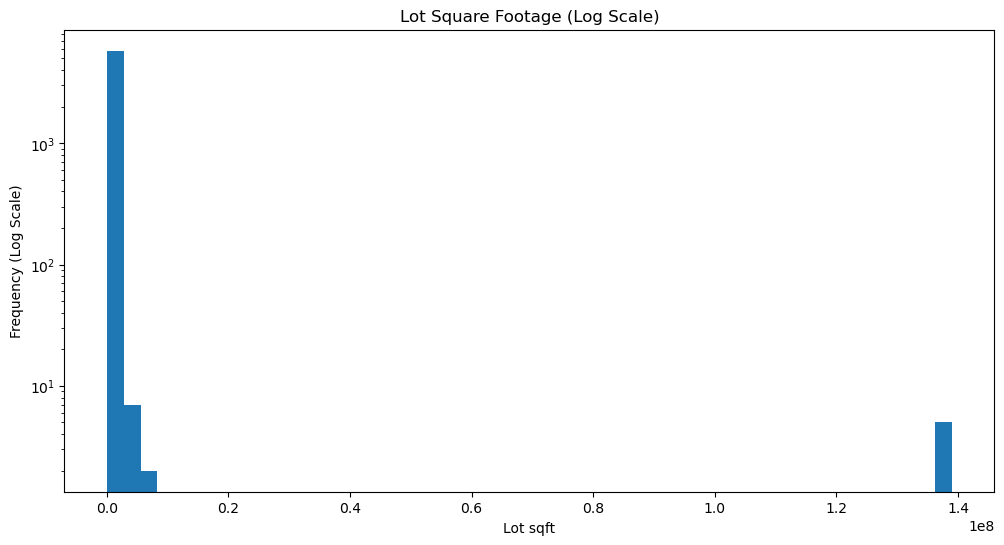

In [15]:
# Before deciding on how to impute sqft and lot_sqft let's look at their distribution

# Plot the distribution for lot_sqft
plt.figure(figsize = (12, 6))
plt.hist(df['description_lot_sqft'].dropna(), bins = 50, log = True) # log scale compresses the wide data range (like we have here, from 0 to 139,043,520.0 sq ft), making it easier to visualize
plt.title('Lot Square Footage (Log Scale)')
plt.xlabel('Lot sqft')
plt.ylabel('Frequency (Log Scale)')
plt.show()

We can observe that the majority of observations fall within the smaller square footage ranges. However, due to the presence of outliers with extremely high values, we will choose to impute null values for this column with the median rather than the mean. The median is less affected by outliers compared to the mean, which ensures that our imputation is more robust and less skewed by the extreme values.

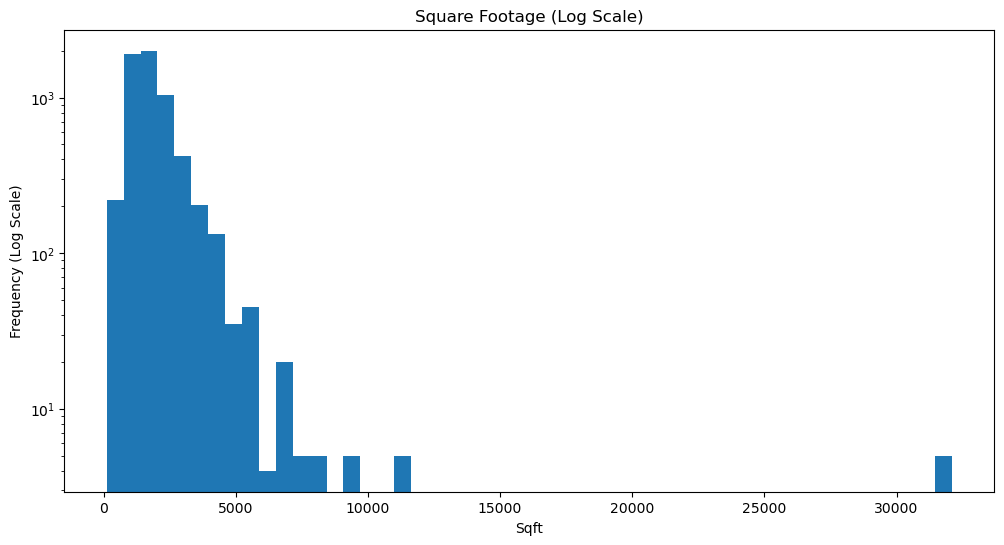

In [16]:
# Plot the distribution for sqft
plt.figure(figsize = (12, 6))
plt.hist(df['description_sqft'].dropna(), bins = 50, log = True) # log scale compresses the wide data range (like we have here, from 0 to 139,043,520.0 sq ft), making it easier to visualize
plt.title('Square Footage (Log Scale)')
plt.xlabel('Sqft')
plt.ylabel('Frequency (Log Scale)')
plt.show()

Similarly, we will impute the median for this column, as we can see that outliers are present.

In [17]:
# Fill null values with mean for sq ft of the lot and house
df['description_lot_sqft'] = df['description_lot_sqft'].fillna(df['description_lot_sqft'].median())
df['description_sqft'] = df['description_sqft'].fillna(df['description_sqft'].median())

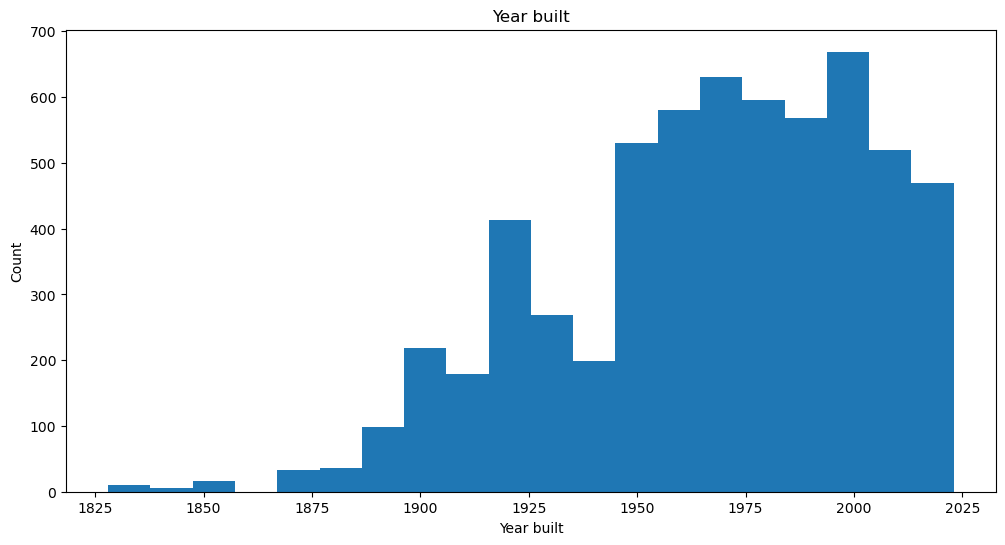

In [18]:
plt.figure(figsize = (12, 6))
plt.hist(df['description_year_built'].dropna(), bins = 20) # log scale compresses the wide data range (like we have here, from 0 to 139,043,520.0 sq ft), making it easier to visualize
plt.title('Year built')
plt.xlabel('Year built')
plt.ylabel('Count')
plt.show()

Since we observe a few houses that were built a long time ago, we've decided to impute the missing values with the median, as it is less influenced by outliers.

In [19]:
# Calculate median for description_year_built
year_built_median = df['description_year_built'].median()
year_built_median_int = int(year_built_median)
year_built_median_int

1972

In [20]:
# Fill null values for year built with the median
df['description_year_built'] = df['description_year_built'].fillna(year_built_median_int)

In [21]:
# Change year built into decades
df['description_year_built_decade'] = (df['description_year_built'] // 10) * 10
df['description_year_built_decade'] = df['description_year_built_decade'].astype(int)
# Drop description_year_built
df = df.drop(columns = 'description_year_built', errors = 'ignore')

In [22]:
# Dealing with multiple baths columns:

df['check'] = df['description_baths'] == (df['description_baths_full'] + df['description_baths_3qtr'] * 0.75 + df['description_baths_half'] * 0.5)
print(df['check'].value_counts())

check
True     4424
False    2292
Name: count, dtype: int64


Let's assume that the result above means that there could be several reasons for this discrepancy: 
- There may be inconsistencies in how bath types were recorded, such as incorrect counts for each batch type.
- Some properties may have missing or incorrect bath information across columns.
- The baths column may have been calculated differently than the sum of the other bath columns.

Combining the columns into total_baths is useful because it provides a more consistent representation of the different bath types. It benefits the ML model, as it consolidates bath features into a single variable, making the data easier to work with.


In [23]:
# Create a new column 'total_baths' by combining full_baths, 3qtr_baths, and half_baths
df['total_baths'] = df['description_baths_full'] + df['description_baths_3qtr'] * 0.75 + df['description_baths_half'] * 0.5

df.drop(['description_baths_full', 'description_baths_3qtr', 'description_baths_half', 'description_baths', 'check'], axis = 1, inplace = True)

#### Categorical features

In [24]:
# Fill null values for description_type with the most frequent value
df['description_type'] = df['description_type'].fillna(df['description_type'].mode()[0])

In [25]:
df['description_type'].unique()

array(['single_family', 'land', 'townhomes', 'multi_family', 'apartment',
       'mobile', 'condos', 'condo', 'other', 'duplex_triplex',
       'condo_townhome_rowhome_coop'], dtype=object)

In [26]:
df = pd.get_dummies(df, columns = ['description_type'], drop_first = True, dtype = 'int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 30 to 8185
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   tags                                          6330 non-null   object 
 1   description_sold_price                        6716 non-null   float64
 2   description_lot_sqft                          6716 non-null   float64
 3   description_sqft                              6716 non-null   float64
 4   description_garage                            6716 non-null   float64
 5   description_stories                           6716 non-null   float64
 6   description_beds                              6716 non-null   float64
 7   location_address_state                        6716 non-null   object 
 8   location_address_city                         6711 non-null   object 
 9   description_year_built_decade                 6716 non-null   int32

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [27]:
# OHE categorical variables/ tags here
# tags will have to be done manually

In [28]:
# Create a column that would serve as a unique row identifier
df['id'] = range(1, len(df) + 1)

# Extract tags column into a separate df
tags_df = df[['id', 'tags']].explode('tags')
tags_df.rename(columns = {'tags': 'tag'}, inplace = True)

In [29]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68921 entries, 30 to 8185
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      68921 non-null  int64 
 1   tag     68535 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [30]:
# Check the unique number of tags
tags_df['tag'].nunique()

152

In [31]:
# Check frequency for each tag
tags_frequency = tags_df['tag'].value_counts()
tags_frequency.head(25)

tag
garage_1_or_more               3778
central_air                    3415
community_outdoor_space        3117
dishwasher                     2975
basement                       2936
fireplace                      2743
forced_air                     2711
single_story                   2653
two_or_more_stories            2621
garage_2_or_more               2497
hardwood_floors                2185
washer_dryer                   1839
laundry_room                   1834
shopping                       1600
recreation_facilities          1515
dining_room                    1359
view                           1309
community_security_features    1309
central_heat                   1088
family_room                    1019
city_view                      1018
fenced_yard                     993
big_lot                         821
floor_plan                      814
new_roof                        747
Name: count, dtype: int64

In [32]:
#Create a list for the top 20 tags

top_20_tags = tags_df['tag'].value_counts().nlargest(20).index

In [33]:
filtered_tags = tags_df[tags_df['tag'].isin(top_20_tags)]

In [34]:
tags_added_df = pd.merge(df.drop(columns = 'tags'), filtered_tags, on = 'id')

In [35]:
ohe_tags = pd.get_dummies(tags_added_df['tag'], drop_first = True, dtype = 'int8')
ohe_df = pd.concat([tags_added_df[['id']], ohe_tags], axis = 1)

In [36]:
ohe_tags.head()

,central_air,central_heat,community_outdoor_space,community_security_features,dining_room,dishwasher,family_room,fireplace,forced_air,garage_1_or_more,garage_2_or_more,hardwood_floors,laundry_room,recreation_facilities,shopping,single_story,two_or_more_stories,view,washer_dryer
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# Group by id and sum the one-hot encoded columns

ohe_df = ohe_df.groupby('id').sum().reset_index()

# Merge 

no_tags_df = tags_added_df.drop(columns = 'tag').drop_duplicates(subset = 'id')

final_df = pd.merge(no_tags_df, ohe_df, on = 'id')

final_df.drop(columns = 'id', inplace = True)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133 entries, 0 to 6132
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   description_sold_price                        6133 non-null   float64
 1   description_lot_sqft                          6133 non-null   float64
 2   description_sqft                              6133 non-null   float64
 3   description_garage                            6133 non-null   float64
 4   description_stories                           6133 non-null   float64
 5   description_beds                              6133 non-null   float64
 6   location_address_state                        6133 non-null   object 
 7   location_address_city                         6128 non-null   object 
 8   description_year_built_decade                 6133 non-null   int32  
 9   total_baths                                   6133 non-null   f

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [38]:
# Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?

## Target Encoding (for City and State). Target encoding replaces the categorical value with the mean of the target variable (description_sold_price) for each category. This approach can be helpful when the relationship between city or state and the target is meaningful.

import pandas as pd

# Apply target encoding on city column
city_target_mean = final_df.groupby('location_address_city')['description_sold_price'].mean()

# Map the means back to the original dataframe
final_df['city_encoded'] = final_df['location_address_city'].map(city_target_mean)

In [39]:
# Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.

# Frequency encode city
city_freq = final_df['location_address_city'].value_counts().to_dict()

# Map the frequencies back to the original dataframe
final_df['city_encoded'] = final_df['location_address_city'].map(city_freq)

In [40]:
# Leave-One-Out Encoding (LOO)
# Leave-One-Out encoding is a variant of target encoding that calculates the mean of the target for each category, excluding the current observation. This reduces the bias in target encoding, especially when the dataset is small.

import category_encoders as ce

# Instantiate the encoder
loo_encoder = ce.LeaveOneOutEncoder(cols='location_address_city')

# Apply Leave-One-Out encoding
final_df['city_encoded'] = loo_encoder.fit_transform(final_df['location_address_city'], final_df['description_sold_price'])

In [41]:
# What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
# Yes, using target encoding for cities by calculating the mean sale price is an effective way to transform the city into a feature. Here's how you can implement it:
# 1 Group by City: Calculate the mean sale price for each city using the training data.
# 2 Map the Encoded Values: Use these means as the encoded values for each city.

# Step 1: Group by 'location_address_city' and calculate mean sale price
city_target_mean = final_df.groupby('location_address_city')['description_sold_price'].mean()

# Step 2: Map the mean sale price to each city in the DataFrame
final_df['city_encoded'] = final_df['location_address_city'].map(city_target_mean)

# Check the result
print(final_df[['location_address_city', 'city_encoded']].head())

  location_address_city   city_encoded
0            Montgomery  181955.858537
1            Montgomery  181955.858537
2            Montgomery  181955.858537
3            Montgomery  181955.858537
4            Montgomery  181955.858537


In [42]:
# We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city,
#  without needing to encode city explicitly
# By using target encoding only on the training data, we're preventing data leakage and maintaining the integrity of your model. 
# This allows the model to use the mean sale price as a starting point for predictions, without needing to explicitly encode city as a feature.


In [43]:
# If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. 
# This is a great time to train test split. Compute on the training data, and join these values to the test data
# To prevent data leakage when applying target encoding, you'll want to split the data first. Here’s the step-by-step approach to ensure that:
# 1.Split the Data: Perform a train-test split before applying the target encoding.
# 2. Compute Mean on Training Data: Calculate the mean sale price by city (or state) only on the training data.
# 3. Join the Encoded Values to the Test Data: Map the mean values to both the training and test datasets.

from sklearn.model_selection import train_test_split

# Step 1: Perform the train-test split
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)

# Step 2: Calculate the target mean (sale price) by city on the training data
city_target_mean = train_data.groupby('location_address_city')['description_sold_price'].mean()

# Step 3: Map the city mean to the training and test data
train_data['city_encoded'] = train_data['location_address_city'].map(city_target_mean)
test_data['city_encoded'] = test_data['location_address_city'].map(city_target_mean)

# Handle any missing values in the test data (if the city is not in the training data)
test_data['city_encoded'].fillna(train_data['description_sold_price'].mean(), inplace=True)

# Now is ready for modeling without data leakage!


C:\Users\werwa\AppData\Local\Temp\ipykernel_5416\2426655446.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['city_encoded'].fillna(train_data['description_sold_price'].mean(), inplace=True)


In [44]:
final_df.drop(['location_address_city', 'location_address_state'], axis = 1, inplace = True)
# final_df.info()

In [45]:
# perform train test split here

from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = final_df.drop(columns=['description_sold_price'])
y = final_df['description_sold_price']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4906, 37)
X_test shape: (1227, 37)
y_train shape: (4906,)
y_test shape: (1227,)


## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [46]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [47]:
# perform EDA here

In [48]:
final_df.describe()

,description_sold_price,description_lot_sqft,description_sqft,description_garage,description_stories,description_beds,description_year_built_decade,total_baths,description_type_condo,description_type_condo_townhome_rowhome_coop,...,garage_2_or_more,hardwood_floors,laundry_room,recreation_facilities,shopping,single_story,two_or_more_stories,view,washer_dryer,city_encoded
count,6.133000e+03,6.133000e+03,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.0,6133.000000,...,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6.128000e+03
mean,4.086375e+05,1.311874e+05,1893.507256,1.079896,1.313224,3.162726,1962.612098,2.026251,0.0,0.000815,...,0.407142,0.356269,0.299038,0.247024,0.260884,0.432578,0.427360,0.213436,0.299853,4.085874e+05
std,5.267661e+05,3.969631e+06,1321.088728,1.170331,0.923289,1.342613,34.535767,0.956982,0.0,0.028543,...,0.491342,0.478935,0.457874,0.431316,0.439152,0.495474,0.494736,0.409766,0.458231,2.318291e+05
min,3.800000e+03,0.000000e+00,120.000000,0.000000,0.000000,0.000000,1820.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000e+04
25%,2.050000e+05,5.227000e+03,1252.000000,0.000000,1.000000,3.000000,1940.000000,1.500000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.451700e+05
50%,3.180000e+05,7.841000e+03,1629.000000,1.000000,1.000000,3.000000,1970.000000,2.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.201657e+05
75%,4.700000e+05,1.132600e+04,2197.000000,2.000000,2.000000,4.000000,1990.000000,2.500000,0.0,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.145989e+05
max,1.250000e+07,1.390435e+08,32106.000000,11.000000,10.000000,12.000000,2020.000000,8.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.307286e+06


In [49]:
# Feature correlation

numeric_df = final_df.select_dtypes(include = ['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Get the absolute value of the correlation matrix
abs_corr_matrix = correlation_matrix.abs()

# Mask the upper triangle of the matrix
mask = np.triu(np.ones_like(abs_corr_matrix, dtype = bool), k = 1)
masked_corr = abs_corr_matrix.where(mask)

# Find the most correlated feature pairs
# Stack the df and sort by correlation value
correlation_pairs = masked_corr.stack().sort_values(ascending = False)
correlation_pairs
# Display the 5 most correlated pairs
top_correlated = 5
print(correlation_pairs.head(top_correlated))

description_beds        total_baths         0.618570
description_sqft        total_baths         0.481311
description_sold_price  city_encoded        0.439922
                        total_baths         0.400104
description_sqft        description_beds    0.385661
dtype: float64


<Axes: >

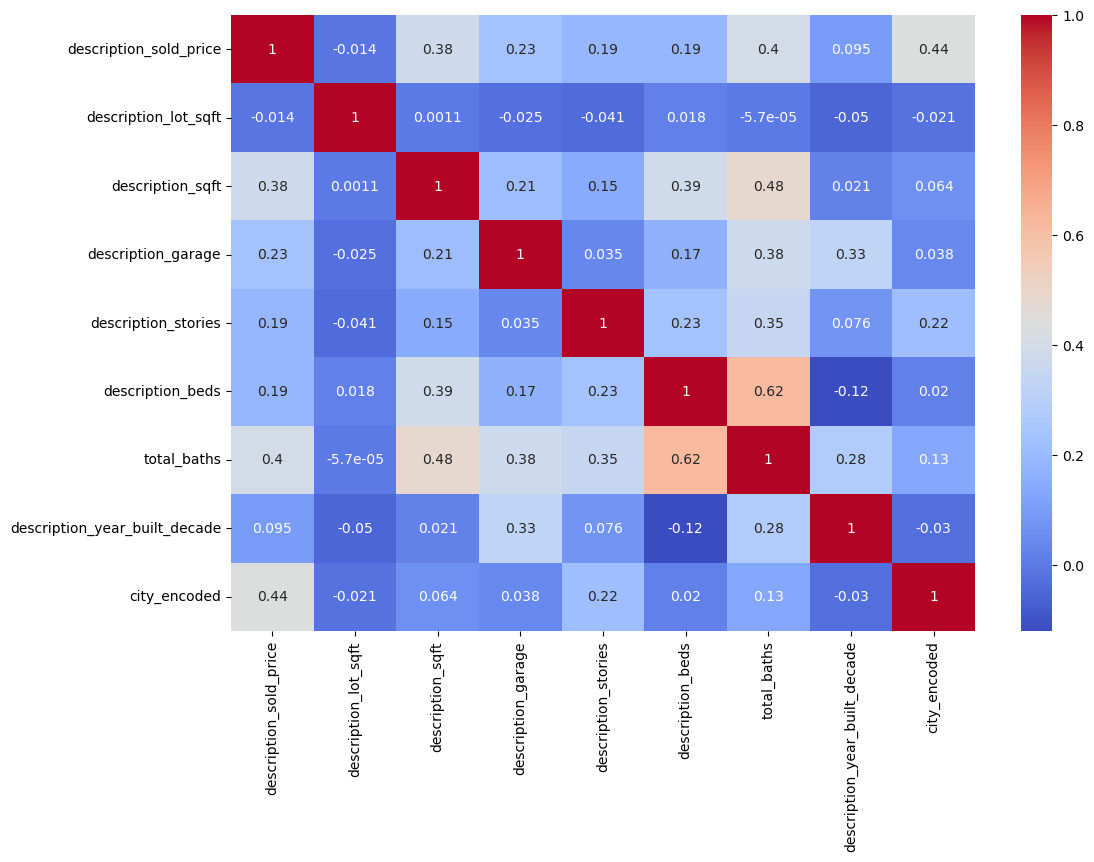

In [50]:
# Heatmap
cols = ['description_sold_price',
        'description_lot_sqft',
        'description_sqft',
        'description_garage',
        'description_stories',
        'description_beds',
        'total_baths',
        'description_year_built_decade',
        'city_encoded'
]

numeric_df = final_df[cols]

correlation_matrix = numeric_df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")

array([[<Axes: title={'center': 'description_sold_price'}>,
        <Axes: title={'center': 'description_lot_sqft'}>,
        <Axes: title={'center': 'description_sqft'}>],
       [<Axes: title={'center': 'description_garage'}>,
        <Axes: title={'center': 'description_stories'}>,
        <Axes: title={'center': 'description_beds'}>],
       [<Axes: title={'center': 'description_year_built_decade'}>,
        <Axes: title={'center': 'total_baths'}>,
        <Axes: title={'center': 'city_encoded'}>]], dtype=object)

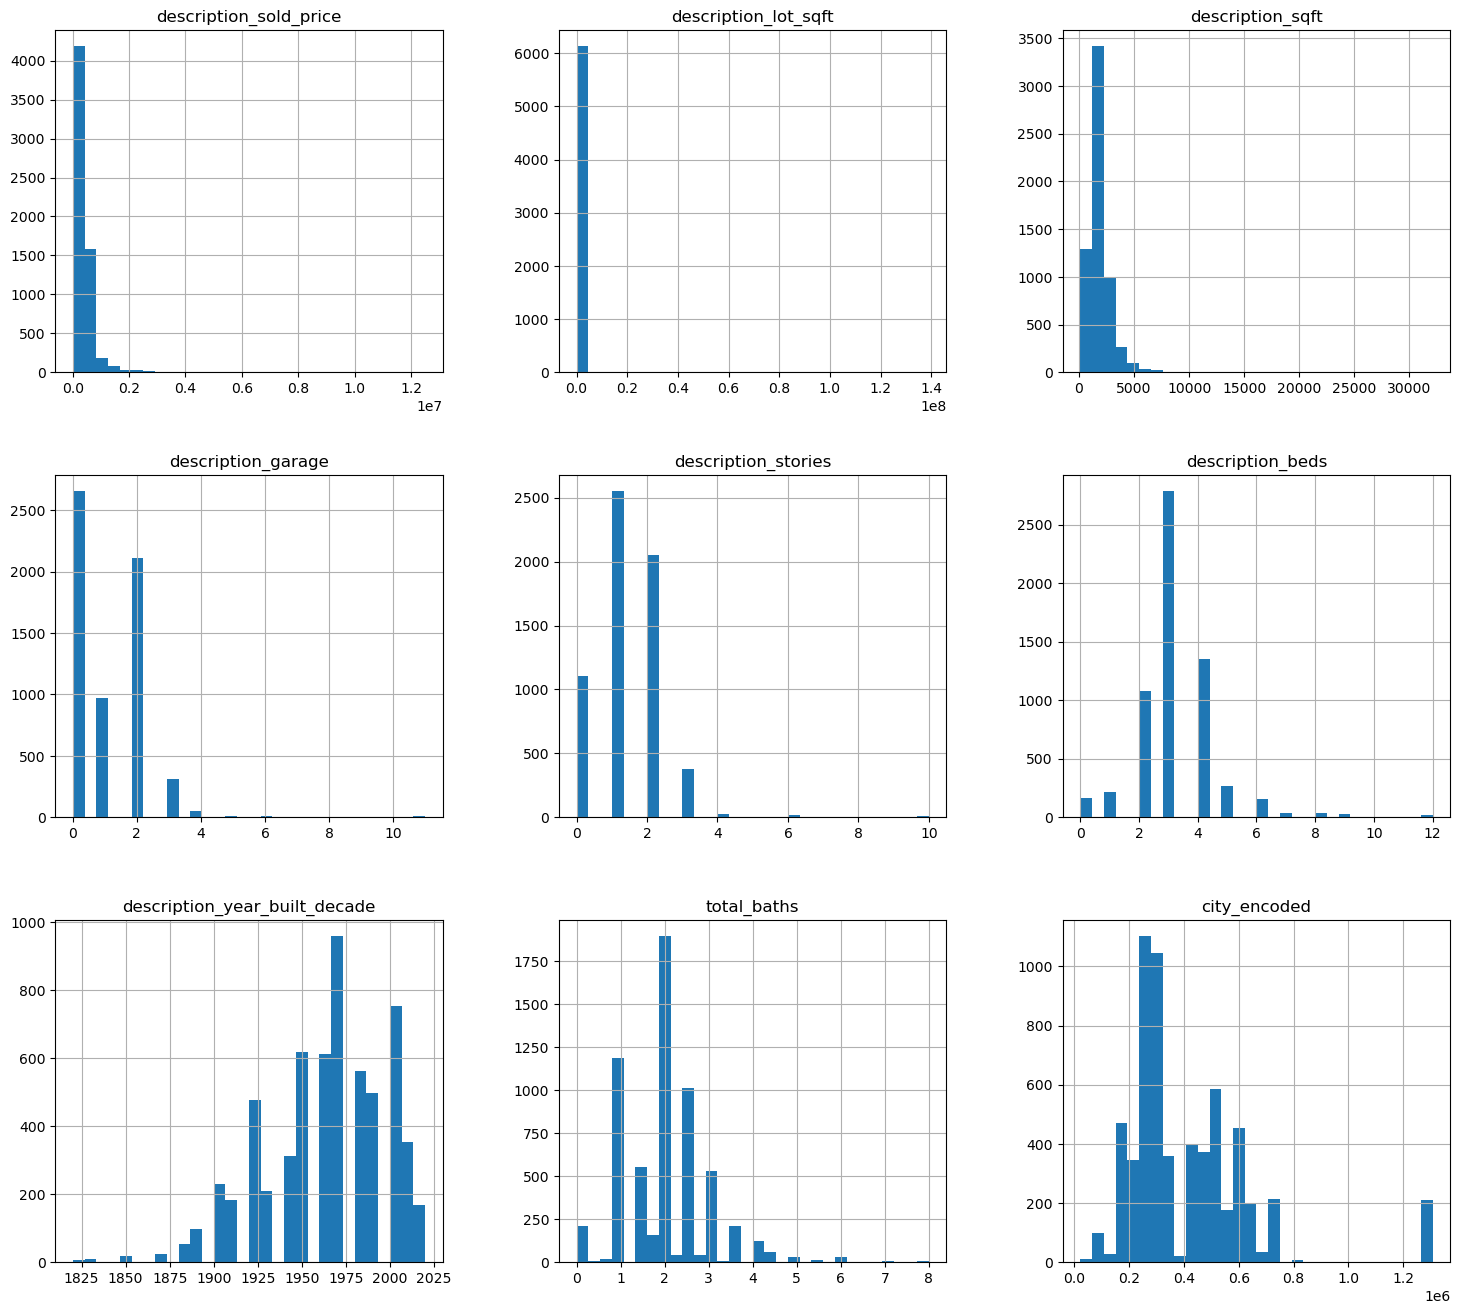

In [51]:
# Distributions, We will only check columns which are not coming from ohe

num_cols = final_df.select_dtypes(include = ['int', 'float']).columns.tolist()

#To see the distribution I will plot histograms for distance to the station, rating, free bikes and empty slots
final_df.hist(column = num_cols, bins = 30, figsize = (18, 16))

Summary from the distribution plot

In [52]:
# Scatterplot

# sns.pairplot(final_df[num_cols])

Summary from the scatterplot

#### Outliers

In [53]:
from scipy import stats

# Function to detect outliers using Z-score for specific columns
def detect_outliers_zscore(df, columns, threshold = 3):
    outliers = pd.DataFrame(False, index = df.index, columns = columns)  # Initialize a df of False values
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))  # Calculate Z-scores
        outliers[col] = z_scores > threshold  # Mark outliers where Z-score exceeds the threshold
    return outliers

# Specify the columns in X_train where you want to detect outliers
col_outliers = ['description_lot_sqft', 'description_sqft', 'description_garage', 
                'description_stories', 'description_beds', 'total_baths', 
                'description_year_built_decade']

# Detect outliers for X_train
X_train_outliers = detect_outliers_zscore(X_train, col_outliers)

# Detect outliers for y_train (since it's a Series, we handle it slightly differently)
y_train_outliers = pd.Series(np.abs(stats.zscore(y_train)) > 3, index = y_train.index)

# Combine outliers for X_train and y_train into a single mask
outliers_combined = X_train_outliers.any(axis = 1) | y_train_outliers

# Filter out rows that have outliers in either X_train or y_train
X_train = X_train[~outliers_combined]
y_train = y_train[~outliers_combined]

# Print the results
print(f"Cleaned X_train shape: {X_train.shape}")
print(f"Cleaned y_train shape: {y_train.shape}")

Cleaned X_train shape: (4664, 37)
Cleaned y_train shape: (4664,)


## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [54]:
#Exporting test/training data into CSV

X_train.to_csv('../data/preprocessed/X_train.csv', index = False)
X_test.to_csv('../data/preprocessed/X_test.csv', index = False)
y_train.to_csv('../data/preprocessed/y_train.csv', index = False)
y_test.to_csv('../data/preprocessed/y_test.csv', index = False)

In [55]:
final_df.to_csv('../data/preprocessed/housing_df_preprocessed.csv', index = False)

In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133 entries, 0 to 6132
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   description_sold_price                        6133 non-null   float64
 1   description_lot_sqft                          6133 non-null   float64
 2   description_sqft                              6133 non-null   float64
 3   description_garage                            6133 non-null   float64
 4   description_stories                           6133 non-null   float64
 5   description_beds                              6133 non-null   float64
 6   description_year_built_decade                 6133 non-null   int32  
 7   total_baths                                   6133 non-null   float64
 8   description_type_condo                        6133 non-null   int8   
 9   description_type_condo_townhome_rowhome_coop  6133 non-null   i